# Проект: Линейные модели в машинном обучении

Хозяйство "Вольный луг" решило расширить своё поголовье коров и заключило выгодный контракт с ассоциацией пастбищ "ЭкоФерма".


**Цель** данного проекта является разработка модели машинного обучения, которая поможет фермеру "Вольного луга" оценить потенциал каждой коровы и принять обоснованное решение о её приобретении. Для этого необходимо разработать две модели машинного обучения: одна будет прогнозировать удой коровы, а вторая — оценивать вероятность получения вкусного молока от коровы.

**Задачи:**
* Первичная обработка и исследовательский анализ данных.
* Подготовка данных для обучения моделей.
* Создание двух прогнозных моделей:
    1. Прогнозирование удоя коровы:
       - Целевой признак: Удой молока.
       - Модель должна оценивать возможный удой каждой коровы в поголовье.
       - Отбираются коровы с средним удоем не менее 6000 кг в год.
       
    2. Оценка вероятности вкусного молока:
       - Целевой признак: Качество молока (вкус).
       - Модель должна предсказывать вероятность получения вкусного молока от каждой коровы.
       - Отбираются коровы, дающие молоко, соответствующее строгим критериям качества.
* Оценка качества и производительности разработанных моделей.
* Интерпретация результатов, общий вывод и формулирование рекомендаций для фермера "Вольный луг".

**План работы:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ
4. Корреляционный анализ
5. Подготовка данных для обучения моделей
6. Обучение модели линейной регрессии на данных из файла df_ferma_main
7. Проверка модели и ее применение  на данных из файла df_cow_buy_old
8. Обучение модели логистической регрессии на данных из файла df_ferma_main
9. Проверка модели и ее применение на данных из файла df_cow_buy_old
10. Итоговые выводы

Для обучения моделей и принятия обоснованных решений о покупке коров будут использованы данные, предоставленные ассоциацией пастбищ "ЭкоФерма".

## Загрузка данных

In [ ]:
!pip install phik -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pylab

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro
from io import StringIO

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
RANDOM_STATE = 42

In [ ]:
df_main = pd.read_csv('/datasets/ferma_main.csv', sep= ';', decimal= ',')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep= ';', decimal= ',')
df_cow = pd.read_csv('/datasets/cow_buy_old.csv', sep= ';', decimal= ',')

In [ ]:
df_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


Описание данных:
* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
* Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [ ]:
df_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

In [ ]:
df_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Вывод: При первичном анализе данных были выявлены следующие проблемы:

* Файлы при прочтении имеет проблему с видом столбцов (название столбцов не соответствует нормам кода), которую нужно обработать далее.
* Тип данных следует проверить после форматирования строк, на данном этапе тип данных, почти для всех столбцов - object

##  Предобработка данных

### Измененние форматирования столбцев

Исправим названия столбцов в каждом датафрейме.

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [ ]:
columns_mapping = {
    'id': 'id',
    'Удой, кг': 'yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'eke',
    'Сырой протеин, г': 'raw_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'spo',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
}
df_main = df_main.rename(columns=columns_mapping).rename(columns=str.lower)
df_main.head()

,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [ ]:
df_dad = df_dad.rename(columns={'Имя Папы': 'dad_name'}).rename(columns=str.lower)
df_dad.head()

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [ ]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [ ]:
columns_mapping_cow= {
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Имя_папы': 'dad_name',
    'Текущая_жирность,%': 'fat_percentage',
    'Текущий_уровень_белок,%': 'protein_percentage'
}
df_cow = df_cow.rename(columns=columns_mapping_cow).rename(columns=str.lower)
df_cow.head()

,breed,pasture_type,sire_breed,dad_name,fat_percentage,protein_percentage
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


**Вывод:**
* Столбцы приведены к единому стилю, по нормам стиля кода.  

### Изменение типов данных

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  634 non-null    int64  
 1   yield_kg            634 non-null    int64  
 2   eke                 634 non-null    float64
 3   raw_protein_g       634 non-null    int64  
 4   spo                 634 non-null    float64
 5   breed               634 non-null    object 
 6   pasture_type        634 non-null    object 
 7   sire_breed          634 non-null    object 
 8   fat_percentage      634 non-null    float64
 9   protein_percentage  634 non-null    float64
 10  milk_taste          634 non-null    object 
 11  age                 634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [ ]:
columns= ['fat_percentage','protein_percentage','spo','eke']
df_main[columns] = df_main[columns].replace(',', '.', regex=True).astype(float)
df_main['protein_percentage'] = df_main['protein_percentage']
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  634 non-null    int64  
 1   yield_kg            634 non-null    int64  
 2   eke                 634 non-null    float64
 3   raw_protein_g       634 non-null    int64  
 4   spo                 634 non-null    float64
 5   breed               634 non-null    object 
 6   pasture_type        634 non-null    object 
 7   sire_breed          634 non-null    object 
 8   fat_percentage      634 non-null    float64
 9   protein_percentage  634 non-null    float64
 10  milk_taste          634 non-null    object 
 11  age                 634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [ ]:
columns= ['fat_percentage','protein_percentage','spo','eke']
df_main[columns] = df_main[columns].replace(',', '.', regex=True).astype(float)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  634 non-null    int64  
 1   yield_kg            634 non-null    int64  
 2   eke                 634 non-null    float64
 3   raw_protein_g       634 non-null    int64  
 4   spo                 634 non-null    float64
 5   breed               634 non-null    object 
 6   pasture_type        634 non-null    object 
 7   sire_breed          634 non-null    object 
 8   fat_percentage      634 non-null    float64
 9   protein_percentage  634 non-null    float64
 10  milk_taste          634 non-null    object 
 11  age                 634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [ ]:
df_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [ ]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               20 non-null     object 
 1   pasture_type        20 non-null     object 
 2   sire_breed          20 non-null     object 
 3   dad_name            20 non-null     object 
 4   fat_percentage      20 non-null     float64
 5   protein_percentage  20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [ ]:
df_cow.head()

,breed,pasture_type,sire_breed,dad_name,fat_percentage,protein_percentage
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074


In [ ]:
columns_cow= ['fat_percentage','protein_percentage']
df_cow[columns_cow] = df_cow[columns_cow].replace(',', '.', regex=True).astype(float)
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               20 non-null     object 
 1   pasture_type        20 non-null     object 
 2   sire_breed          20 non-null     object 
 3   dad_name            20 non-null     object 
 4   fat_percentage      20 non-null     float64
 5   protein_percentage  20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


### Поиск и обработка дубликатов

In [ ]:
def duplicates_df(df,name):
    duplicates = df[df.duplicated()]
    if  duplicates.empty:
        print(f"Явных дубликатов для {name} не обнаружено.")
    else:
        print(f'Обнаружены явные дубликаты для {name}:')
    return duplicates

In [ ]:
duplicates_df(df_main,'df_main')

Обнаружены явные дубликаты для df_main:


,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [ ]:
df_main.drop_duplicates(inplace=True)
duplicates_df(df_main,'df_main')

Явных дубликатов для df_main не обнаружено.


,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age


In [ ]:
duplicates_df(df_dad,'df_dad')

Явных дубликатов для df_dad не обнаружено.


,id,dad_name


In [ ]:
print(df_main.shape)
print(df_cow.shape)
print(df_dad.shape)

(629, 12)
(20, 6)
(629, 2)


In [ ]:
#Проверка неявных дубликатов
unique_df = df_main.drop_duplicates(subset=['id'])
duplicates = len(df_main) - len(unique_df)
if len(df_main) == len(unique_df):
    print(f'нет дубликатов, кол-во дубликатов: {duplicates}')
else:
    print(f'есть дубликаты, кол-во дубликатов: {duplicates}')

нет дубликатов, кол-во дубликатов: 0


In [ ]:
def analyze_column(df):
    results = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            unique_values = df[col].unique()
            num_unique_values = df[col].nunique()
            value_counts = df[col].value_counts()
            results[col] = (unique_values, num_unique_values, value_counts)

    return results

In [ ]:
results = analyze_column(df_main)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'breed':

 Уникальные значения: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Количество уникальных значений: 2
Частота уникальных значений:
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: breed, dtype: int64

 Анализ столбца 'pasture_type':

 Уникальные значения: ['Равнинное' 'Равнинные' 'Холмистое']
Количество уникальных значений: 3
Частота уникальных значений:
Холмистое    351
Равнинное    253
Равнинные     25
Name: pasture_type, dtype: int64

 Анализ столбца 'sire_breed':

 Уникальные значения: ['Айдиал' 'Соверин' 'Айдиалл']
Количество уникальных значений: 3
Частота уникальных значений:
Соверин    311
Айдиал     240
Айдиалл     78
Name: sire_breed, dtype: int64

 Анализ столбца 'milk_taste':

 Уникальные значения: ['вкусно' 'не вкусно']
Количество уникальных значений: 2
Частота уникальных значений:
вкусно       371
не вкусно    258
Name: milk_taste, dtype: int64

 Анализ столбца 'age':

 Уникальные значения: ['более_2_лет' 'менее_2_лет']
Количество уникальных значений: 

В столбцах 'pasture_type' и 'sire_breed'  повторяются одинаковые значения в разном формате, обработаем эти дубликаты, с помощью приведения к одному виду.

In [ ]:
df_main['pasture_type'] = df_main['pasture_type'].str.lower()
df_main['sire_breed'] = df_main['sire_breed'].str.lower()
df_main['breed'] = df_main['breed'].str.lower()
df_main['age'] = df_main['age'].str.rstrip()

replace_dict = {'айдиал': 'вис бэк айдиал', 'айдиалл': 'вис бэк айдиал', 'равнинные': 'равнинное',
                'рефлешнсоверинг': 'рефлешн соверинг','соверин':'рефлешн соверинг','вис бик айдиал': 'вис бэк айдиал'}
df_main['pasture_type'].replace(replace_dict, inplace=True)
df_main['sire_breed'].replace(replace_dict, inplace=True)
df_main['breed'].replace(replace_dict, inplace=True)

print(df_main['pasture_type'].unique())
print(df_main['sire_breed'].unique())
print(df_main['breed'].unique())

['равнинное' 'холмистое']
['вис бэк айдиал' 'рефлешн соверинг']
['вис бэк айдиал' 'рефлешн соверинг']


In [ ]:
results = analyze_column(df_dad)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'dad_name':

 Уникальные значения: ['Буйный' 'Соловчик' 'Барин' 'Геркулес']
Количество уникальных значений: 4
Частота уникальных значений:
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: dad_name, dtype: int64


In [ ]:
results = analyze_column(df_cow)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'breed':

 Уникальные значения: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Количество уникальных значений: 2
Частота уникальных значений:
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: breed, dtype: int64

 Анализ столбца 'pasture_type':

 Уникальные значения: ['холмистое' 'равнинное']
Количество уникальных значений: 2
Частота уникальных значений:
равнинное    11
холмистое     9
Name: pasture_type, dtype: int64

 Анализ столбца 'sire_breed':

 Уникальные значения: ['Айдиал' 'Соверин']
Количество уникальных значений: 2
Частота уникальных значений:
Соверин    12
Айдиал      8
Name: sire_breed, dtype: int64

 Анализ столбца 'dad_name':

 Уникальные значения: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Количество уникальных значений: 4
Частота уникальных значений:
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: dad_name, dtype: int64


Исправим значения в столбцах 'breed' и 'sire_breed', для общего формата с датафреймом df_main и между столбцами в датафрейме df_cow

In [ ]:
df_cow['breed'] = df_cow['breed'].str.lower()
df_cow['sire_breed'] = df_cow['sire_breed'].str.lower()

replace_dict_cow = {'айдиал': 'вис бэк айдиал', 'рефлешнсоверинг': 'рефлешн соверинг', 'соверин':'рефлешн соверинг',
                'вис бик айдиал': 'вис бэк айдиал'}
df_cow['pasture_type'].replace(replace_dict_cow, inplace=True)
df_cow['sire_breed'].replace(replace_dict_cow, inplace=True)
df_cow['breed'].replace(replace_dict_cow, inplace=True)

print(df_cow['sire_breed'].unique())
print(df_cow['breed'].unique())

['вис бэк айдиал' 'рефлешн соверинг']
['вис бэк айдиал' 'рефлешн соверинг']


**Вывод предобработка данных:**
* Было проведено форматирование столбцов к единому стилю
* Изменен тип данных где требовалось
* Найдены и обработаны явные и не явные дубликаты
 > Внесенные изменения в столбцах с названиями пород включают в себя имена "вис бэк айдиал" и "рефлешн соверинг", которые фактически являются названиями линий разведения, а не отдельными породами. Линии разведения, или линии, представляют собой группу животных внутри одной породы, которая имеет общие характеристики, такие как производственные качества или внешний вид, и выведены с помощью особого типа селекции. Важно понимать разницу между породами и линиями, поскольку породы являются более общими категориями, в то время как линии более специализированы и могут иметь уникальные характеристики, которые могут быть важными для конкретных целей разведения или производства. *Эти изменения не оказывают влияния на проект, но при наличии различных пород могли бы повлиять на данные.*


## Исследовательский анализ данных

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  629 non-null    int64  
 1   yield_kg            629 non-null    int64  
 2   eke                 629 non-null    float64
 3   raw_protein_g       629 non-null    int64  
 4   spo                 629 non-null    float64
 5   breed               629 non-null    object 
 6   pasture_type        629 non-null    object 
 7   sire_breed          629 non-null    object 
 8   fat_percentage      629 non-null    float64
 9   protein_percentage  629 non-null    float64
 10  milk_taste          629 non-null    object 
 11  age                 629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


### Анализ признаков в датафрейме df_main

In [ ]:
df_main.describe()

,id,yield_kg,eke,raw_protein_g,spo,fat_percentage,protein_percentage
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


#### Анализ удоя
При вызове метода describe были найдены выбросы( максимальное значение 45616 кг) просмотрим количество таких выбросов и удалим их если количество не значительно, так как это нереалистичные данные ( Мировой рекорд на данный момент 40 000 кг в год).

In [ ]:
yield_count = df_main[df_main['yield_kg'] >= 8000]['yield_kg'].count()
print(f"\nКоличество значений от 8 до 46 тысяч в столбце 'Удой': {yield_count}")


Количество значений от 8 до 46 тысяч в столбце 'Удой': 1


In [ ]:
df_main = df_main.drop(df_main.query('yield_kg >= 8000').index)
df_main['yield_kg'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield_kg, dtype: float64

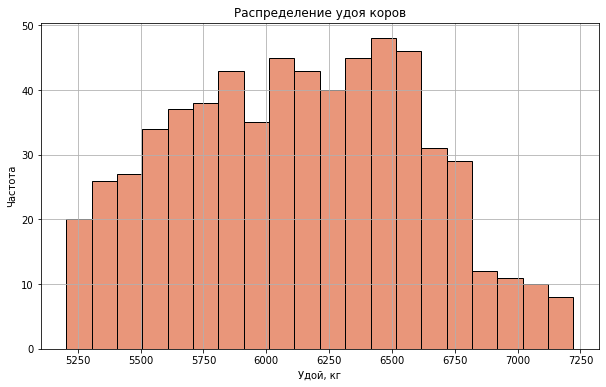

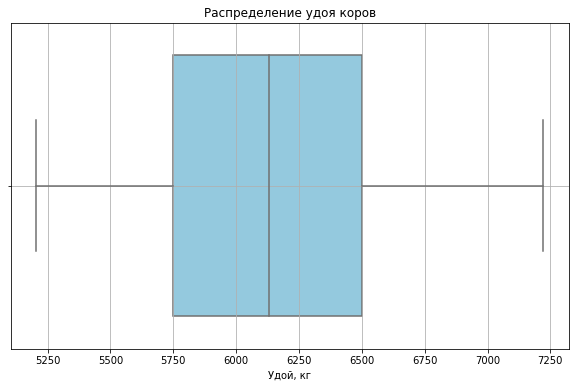

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_main['yield_kg'], bins=20, color='#E9967A', edgecolor='black')

plt.title('Распределение удоя коров')
plt.xlabel('Удой, кг')
plt.ylabel('Частота')
plt.grid(True)


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_main, x='yield_kg', color='skyblue')
plt.title('Распределение удоя коров')
plt.xlabel('Удой, кг')
plt.grid(True)
plt.show()

**Вывод:** Распределение удоя коров показало, что большая часть значений находится в диапазоне, близком к среднему и медиане. Скорее всего, это связано с тем, что условия жизни коров в этом хозяйстве одинаковы, а также с тем, что фермер целенаправленно выбирал коров или телят с удоем или с удоем в родстве в диапазоне от 5 тысяч и выше килограммов в год. Это примерно 13-16 килограммов в день, что является нормой для молочных пород КРС.

#### Анализ показателя питательности корма коровы

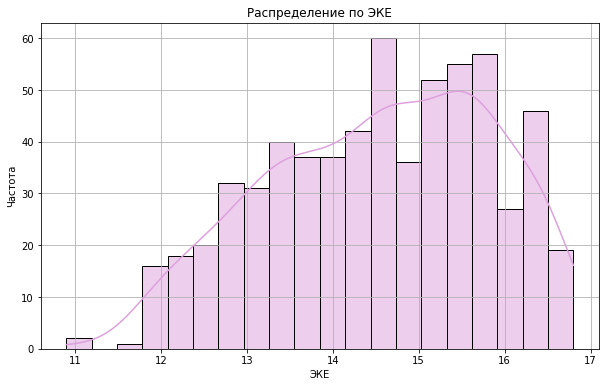

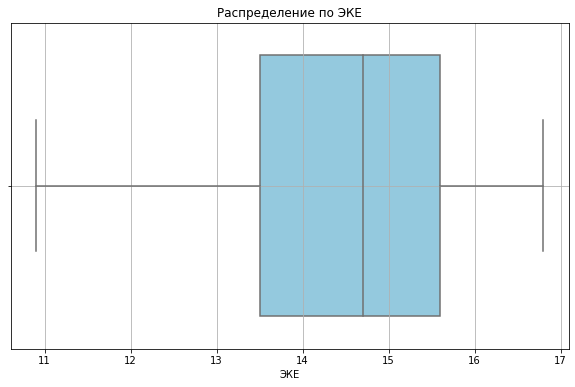

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_main['eke'], bins=20, kde=True, color='#DDA0DD')
plt.title('Распределение по ЭКЕ')
plt.xlabel('ЭКЕ')
plt.ylabel('Частота')
plt.grid(True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_main, x='eke', color='skyblue')
plt.title('Распределение по ЭКЕ')
plt.xlabel('ЭКЕ')
plt.grid(True)
plt.show()

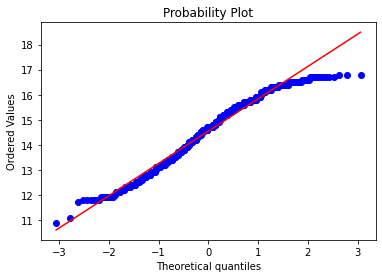

In [ ]:
stats.probplot(df_main['eke'], dist='norm',plot=pylab)
pylab.show()

In [ ]:
stat, p_value = shapiro(df_main['eke'])

print("Статистика теста:", stat)
print("p-значение:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Распределение похоже на нормальное (не удалось отвергнуть нулевую гипотезу)")
else:
    print("Распределение не является нормальным (отвергаем нулевую гипотезу)")

Статистика теста: 0.9713221788406372
p-значение: 9.631184738623233e-10
Распределение не является нормальным (отвергаем нулевую гипотезу)


**Вывод:** Распределение показывает значения от 10 до 16, которые не являются аномальными. Однако можно сделать вывод, что кормление различных коров в этом хозяйстве различается. Обычно ЭКЕ кормов для лактирующих коров и молодняка выше. Возможно, на момент сбора данных некоторые коровы находились в нелактирующем периоде и уровень ЭКЕ в их корме был ниже. Возможно, такой корм дешевле, что позволяет снизить расходы хозяйства.

####  Cодержание сырого протеина в корме

In [ ]:
df_main['raw_protein_g'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein_g, dtype: float64

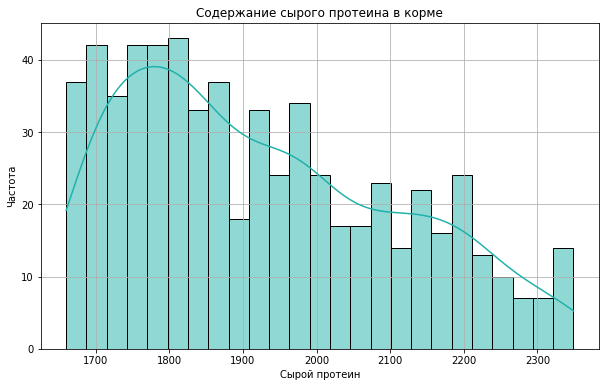

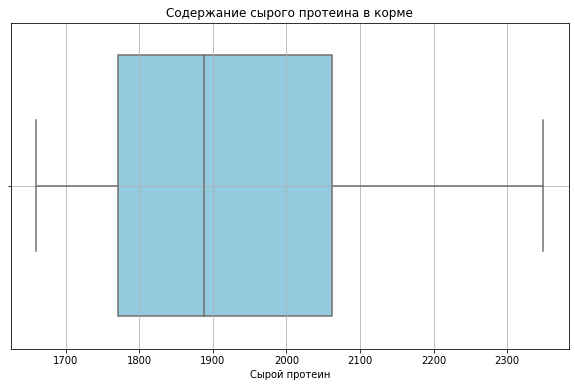

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_main['raw_protein_g'], bins=25, kde=True, color='#20B2AA')
plt.title('Cодержание сырого протеина в корме')
plt.xlabel('Сырой протеин')
plt.ylabel('Частота')
plt.grid(True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_main, x='raw_protein_g', color='skyblue')
plt.title('Cодержание сырого протеина в корме')
plt.xlabel('Сырой протеин')
plt.grid(True)
plt.show()

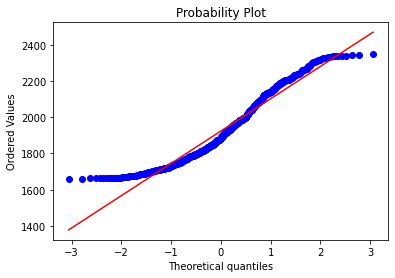

In [ ]:
stats.probplot(df_main['raw_protein_g'], dist='norm',plot=pylab)
pylab.show()

In [ ]:
stat, p_value = shapiro(df_main['raw_protein_g'])

print("Статистика теста:", stat)
print("p-значение:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Распределение похоже на нормальное (не удалось отвергнуть нулевую гипотезу)")
else:
    print("Распределение не является нормальным (отвергаем нулевую гипотезу)")

Статистика теста: 0.9437040686607361
p-значение: 1.0713665740159917e-14
Распределение не является нормальным (отвергаем нулевую гипотезу)


**Вывод:** Распределение не является нормальным. Так же как ЭКЕ, сухой протеин в корм добавляют в зависимости от удоя и/или периода (пастбищный или стойловый), по этому этот показатель у разных коров может отличаться. Сильно выделяющихся значений обнаружено не было.

#### Анализ отношения сахара к протеину в корме коровы.

In [ ]:
df_main['spo'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: spo, dtype: float64

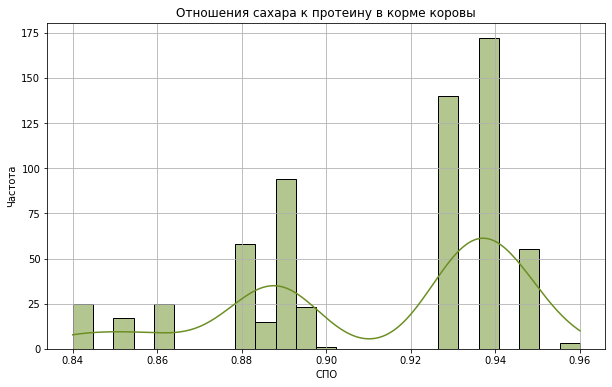

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_main['spo'], bins=25, kde=True, color='#6B8E23')
plt.title('Отношения сахара к протеину в корме коровы')
plt.xlabel('СПО')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [ ]:
stat, p_value = shapiro(df_main['spo'])

print("Статистика теста:", stat)
print("p-значение:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Распределение похоже на нормальное (не удалось отвергнуть нулевую гипотезу)")
else:
    print("Распределение не является нормальным (отвергаем нулевую гипотезу)")

Статистика теста: 0.8555195331573486
p-значение: 1.5345069056487493e-23
Распределение не является нормальным (отвергаем нулевую гипотезу)


**Вывод:** Данные показывают 2-3 группы значений спо в корме коров. Распределение не является нормальным.

#### Анализ содержания жиров в молоке

In [ ]:
df_main['fat_percentage'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_percentage, dtype: float64

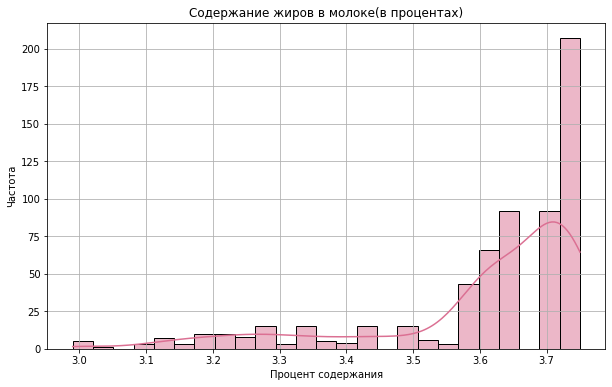

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_main['fat_percentage'], bins=25, kde=True, color='#DB7093')
plt.title('Содержание жиров в молоке(в процентах)')
plt.xlabel('Процент содержания')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [ ]:
stat, p_value = shapiro(df_main['fat_percentage'])

print("Статистика теста:", stat)
print("p-значение:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Распределение похоже на нормальное (не удалось отвергнуть нулевую гипотезу)")
else:
    print("Распределение не является нормальным (отвергаем нулевую гипотезу)")

Статистика теста: 0.7418986558914185
p-значение: 4.189230905200583e-30
Распределение не является нормальным (отвергаем нулевую гипотезу)


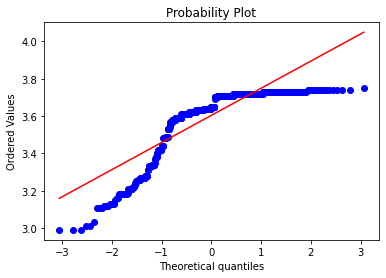

In [ ]:
stats.probplot(df_main['fat_percentage'], dist='norm',plot=pylab)
pylab.show()

**Вывод:** График сильно смещен вправо, однако жирность молока от 3% до 9% считается нормальной для фермерских коров. 75% поголовья имеют жирность молока выше 3.59%. Минимальное значение на графике составляет 3.1. В целом, такой разброс данных не считается аномалией. Так же все данные этого столбца, можно разделить на 3 группы с низкой, средней и высокой жирностью

#### Анализ содержания белков в молоке (в процентах).

In [ ]:
df_main['protein_percentage'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein_percentage, dtype: float64

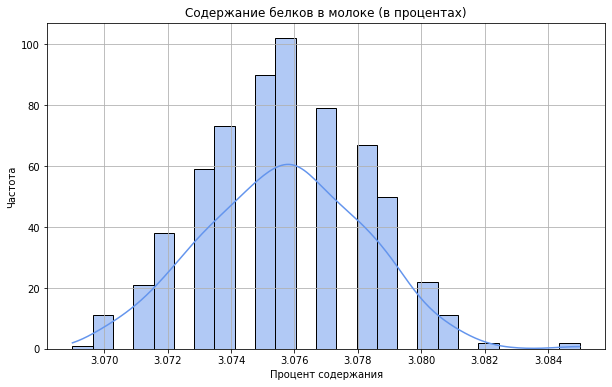

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_main['protein_percentage'], bins=25, kde=True, color='#6495ED')
plt.title('Cодержание белков в молоке (в процентах)')
plt.xlabel('Процент содержания')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [ ]:
stat, p_value = shapiro(df_main['protein_percentage'])

print("Статистика теста:", stat)
print("p-значение:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Распределение похоже на нормальное (не удалось отвергнуть нулевую гипотезу)")
else:
    print("Распределение не является нормальным (отвергаем нулевую гипотезу)")

Статистика теста: 0.9831666350364685
p-значение: 1.2371704087854596e-06
Распределение не является нормальным (отвергаем нулевую гипотезу)


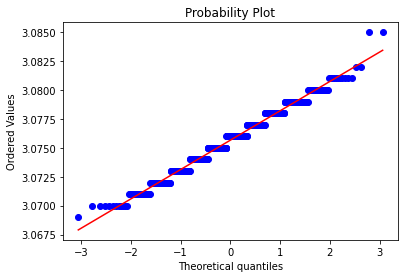

In [ ]:
stats.probplot(df_main['protein_percentage'], dist='norm',plot=pylab)
pylab.show()

**Вывод:** Различия в процентном содержании белка в молоке у коров отличаются всего сотыми долями. Это говорит о практически одинаковом составе белка у коров этой фермы.

#### Анализ категориальных значений df_main

In [ ]:
results = analyze_column(df_main)
for col, (unique_values, num_unique_values, value_counts) in results.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'breed':

 Уникальные значения: ['вис бэк айдиал' 'рефлешн соверинг']
Количество уникальных значений: 2
Частота уникальных значений:
вис бэк айдиал      372
рефлешн соверинг    256
Name: breed, dtype: int64

 Анализ столбца 'pasture_type':

 Уникальные значения: ['равнинное' 'холмистое']
Количество уникальных значений: 2
Частота уникальных значений:
холмистое    350
равнинное    278
Name: pasture_type, dtype: int64

 Анализ столбца 'sire_breed':

 Уникальные значения: ['вис бэк айдиал' 'рефлешн соверинг']
Количество уникальных значений: 2
Частота уникальных значений:
вис бэк айдиал      317
рефлешн соверинг    311
Name: sire_breed, dtype: int64

 Анализ столбца 'milk_taste':

 Уникальные значения: ['вкусно' 'не вкусно']
Количество уникальных значений: 2
Частота уникальных значений:
вкусно       370
не вкусно    258
Name: milk_taste, dtype: int64

 Анализ столбца 'age':

 Уникальные значения: ['более_2_лет' 'менее_2_лет']
Количество уникальных значений: 2
Частота уникал

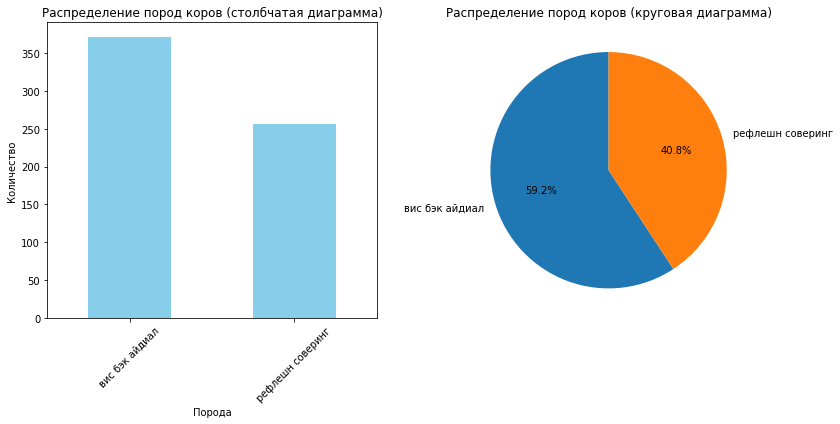

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
breed_counts = df_main['breed'].value_counts()

breed_counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Распределение пород коров (столбчатая диаграмма)')
axes[0].set_xlabel('Порода')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

breed_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Распределение пород коров (круговая диаграмма)')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

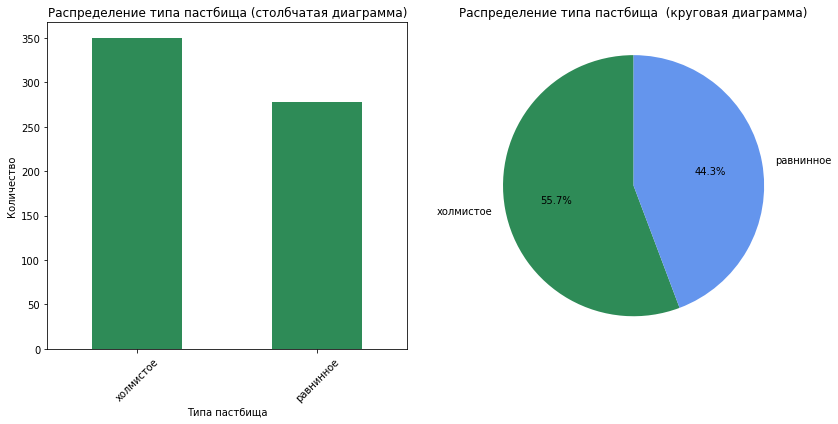

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
pasture_counts = df_main['pasture_type'].value_counts()

pasture_counts.plot(kind='bar', ax=axes[0], color='#2E8B57')
axes[0].set_title('Распределение типа пастбища (столбчатая диаграмма)')
axes[0].set_xlabel('Типа пастбища')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

pasture_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['#2E8B57','#6495ED'])
axes[1].set_title('Распределение типа пастбища  (круговая диаграмма)')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

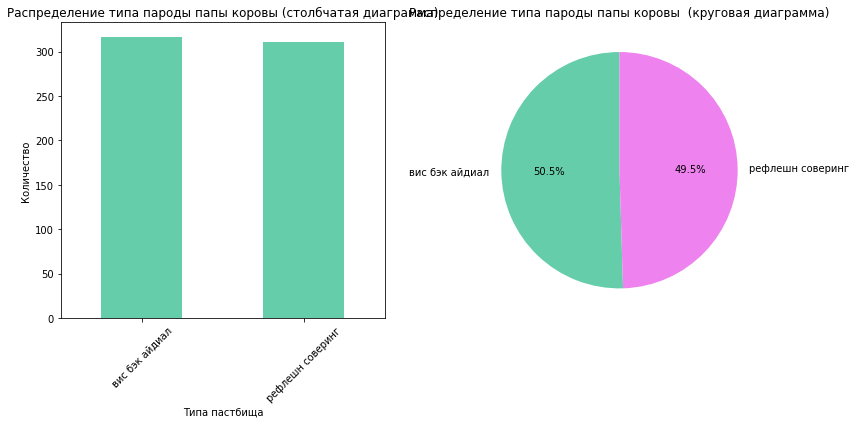

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sire_breed_counts = df_main['sire_breed'].value_counts()

sire_breed_counts.plot(kind='bar', ax=axes[0], color='#66CDAA')
axes[0].set_title('Распределение типа пароды папы коровы (столбчатая диаграмма)')
axes[0].set_xlabel('Типа пастбища')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

sire_breed_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['#66CDAA','#EE82EE'])
axes[1].set_title('Распределение типа пароды папы коровы  (круговая диаграмма)')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

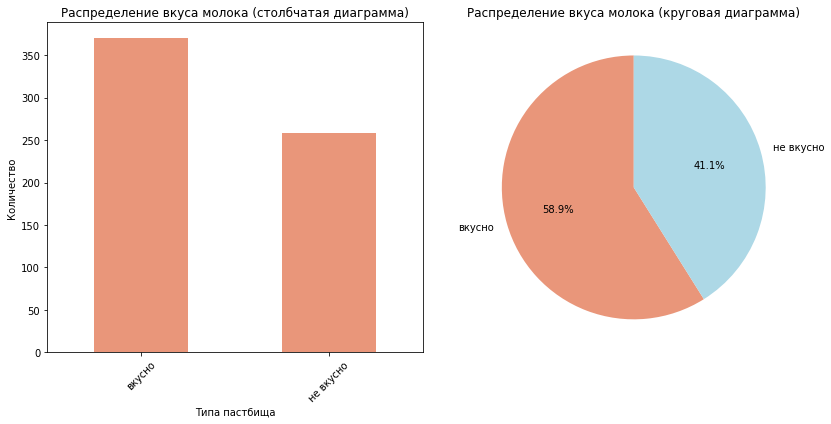

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
milk_taste_counts = df_main['milk_taste'].value_counts()

milk_taste_counts.plot(kind='bar', ax=axes[0], color='#E9967A')
axes[0].set_title('Распределение вкуса молока (столбчатая диаграмма)')
axes[0].set_xlabel('Типа пастбища')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

milk_taste_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['#E9967A','#ADD8E6'])
axes[1].set_title('Распределение вкуса молока (круговая диаграмма)')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

<div class="alert alert-warning">
<b>Комментарий 👉</b>



Наблюдаешь ли дисбаланс в целевой переменной (таргете)? Если наблюдаешь, то как этот факт отражается на выборке метрики для моделей МО?
</div>

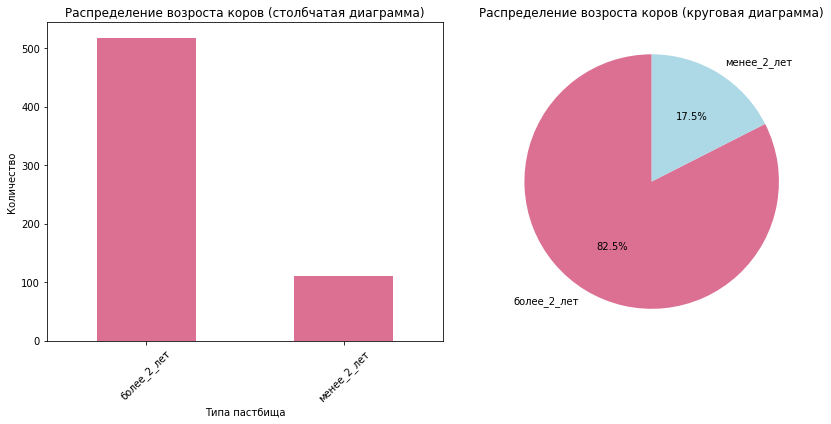

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
age_counts = df_main['age'].value_counts()

age_counts.plot(kind='bar', ax=axes[0], color='#DB7093')
axes[0].set_title('Распределение возроста коров (столбчатая диаграмма)')
axes[0].set_xlabel('Типа пастбища')
axes[0].set_ylabel('Количество')
axes[0].tick_params(axis='x', rotation=45)

age_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=['#DB7093','#ADD8E6'])
axes[1].set_title('Распределение возроста коров (круговая диаграмма)')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

**Вывод:**
Все категориальные данные представлены двумя категориями(бинарные)

В большинстве данных деление равномерно, за исключением age, что является нормальным для распределения возраста коров на ферме.

### Анализ признаков датафрейма df_cow

In [ ]:
df_cow.describe()

,fat_percentage,protein_percentage
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


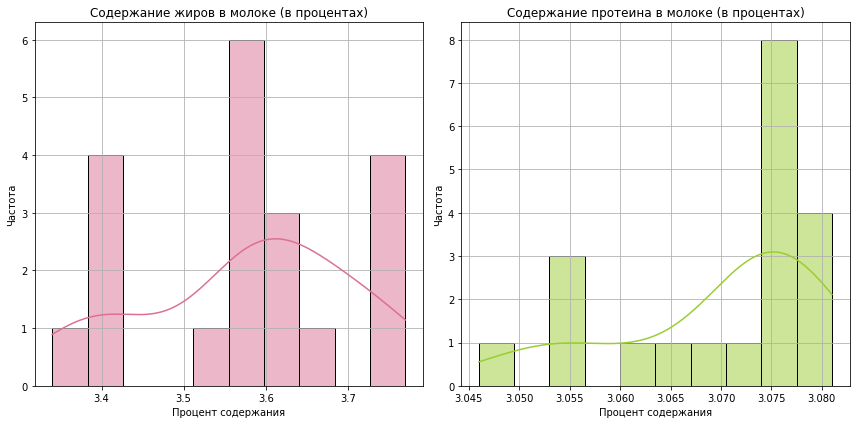

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(df_cow['fat_percentage'], bins=10, kde=True, color='#DB7093', ax=axes[0])
axes[0].set_title('Содержание жиров в молоке (в процентах)')
axes[0].set_xlabel('Процент содержания')
axes[0].set_ylabel('Частота')
axes[0].grid(True)

sns.histplot(df_cow['protein_percentage'], bins=10, kde=True, color='#9ACD32', ax=axes[1])
axes[1].set_title('Содержание протеина в молоке (в процентах)')
axes[1].set_xlabel('Процент содержания')
axes[1].set_ylabel('Частота')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df_main.describe()

,id,yield_kg,eke,raw_protein_g,spo,fat_percentage,protein_percentage
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Вывод:** Данные представлены нормально для распределения процентного содержания жиров и протеинов в молоке , в сравнение коров для покупки(df_cow) и коров на ферме (df_main) содержание протеина выше у коров для покупки, в случае с жиром, наоборот незначительно выше в df_main.  

Содержание белков в коровьем молоке варьируется от 2,8 % до 3,6 %(интернет источники). Имеется прямая зависимость уровня жира в молоке от процента содержания в нем белка, то есть чем выше насыщенность белком, тем жирнее молоко(эти данные нужно проверить на нашем датафрейме). В целом, содержание белка в молоке важно для питательной ценности продукции, ее технологических свойств, качества и цены, а также для здоровья животных.

In [ ]:
results_cow = analyze_column(df_cow)
for col, (unique_values, num_unique_values, value_counts) in results_cow.items():
    print(f"\n Анализ столбца '{col}':")
    print("\n Уникальные значения:", unique_values)
    print("Количество уникальных значений:", num_unique_values)
    print("Частота уникальных значений:")
    print(value_counts)


 Анализ столбца 'breed':

 Уникальные значения: ['вис бэк айдиал' 'рефлешн соверинг']
Количество уникальных значений: 2
Частота уникальных значений:
рефлешн соверинг    11
вис бэк айдиал       9
Name: breed, dtype: int64

 Анализ столбца 'pasture_type':

 Уникальные значения: ['холмистое' 'равнинное']
Количество уникальных значений: 2
Частота уникальных значений:
равнинное    11
холмистое     9
Name: pasture_type, dtype: int64

 Анализ столбца 'sire_breed':

 Уникальные значения: ['вис бэк айдиал' 'рефлешн соверинг']
Количество уникальных значений: 2
Частота уникальных значений:
рефлешн соверинг    12
вис бэк айдиал       8
Name: sire_breed, dtype: int64

 Анализ столбца 'dad_name':

 Уникальные значения: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Количество уникальных значений: 4
Частота уникальных значений:
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: dad_name, dtype: int64


**Вывод:** В данном датафрейме, так же представлены бинарные, категориальные признаки. Они так же распределены равномерно, стоит упомянуть, что у половины коров(8) из датафрейма df_cow, один отец-производитель(Буйный).

**Общий вывод:**
В ходе исследовательского анализа данных выявлены следующие основные выводы:
1. Удой коров на ферме:
   - Большая часть значений удоя находится в диапазоне от 5200 до 7200 кг в год, что соответствует нормальным показателям для молочных пород.
   - Вероятно, фермер осуществляет целенаправленный отбор коров с высоким удоем для разведения.
   - Были найдены незначительные выбросы. которые, были удалены
   
2. Энергетическая кормовая единица (ЭКЕ):
   - Распределение данных по этому показателю могут варьироваться в зависимости от кормления и ухода за коровами.Некоторые коровы могут находиться в нелактирующем периоде, что влияет на уровень ЭКЕ в их корме.
   - Распределение показывает диапазон значений от 10 до 16
   
3. Сырой протеин:
   - Распределение содержания сырого протеина в корме коров находится в пределах нормы для молочных пород.
   - Отмечается схожесть показателей у различных коров.
   - Данные можно разделить на 2 группы.
   
4. Жирность молока:
   - Большинство значений жирности молока находится в диапазоне от 3.6% до 3.7%, что соответствует стандартам для фермерских коров.
   - Минимальные значения могут быть незначительно ниже стандартов, но не являются аномальными.
   - Данные можно разделить на 3 группы.
   
5. Процент содержания белка в молоке:
   - Различия в процентном содержании белка незначительны, что указывает на однородность состава молока у коров фермы.
   - Данные можно разделить на 2 группы.
   
6. Категориальные признаки:
   - Бинарные категориальные данные распределены равномерно.

Данные свидетельствуют о стабильности производства молока на ферме, хотя могут наблюдаться некоторые различия в составе корма и показателях молока у отдельных коров. Это может быть обусловлено различными стадиями жизни животного, возрост до 2х лет, видом пастбища и/или пастбищным периодом(не указан в данных) и тд. Большинство данных представлены ненормальным распределением.

### Создание новых столбцов с категориями некоторых признаков.

In [ ]:
df_main['spo_category'] = pd.cut(df_main['spo'], bins=[0.83, 0.91, 0.97], labels=['низкий спо', 'высокий спо'])
df_main.head(2)

,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age,spo_category
0,1,5863,14.2,1743,0.89,вис бэк айдиал,равнинное,вис бэк айдиал,3.58,3.076,вкусно,более_2_лет,низкий спо
1,2,5529,12.8,2138,0.89,вис бэк айдиал,равнинное,рефлешн соверинг,3.54,3.079,вкусно,менее_2_лет,низкий спо


In [ ]:
df_main['fat_percentage_category'] = pd.cut(df_main['fat_percentage'],
                                            bins=[2.98, 3.45, 3.65, 3.76],
                                            labels=['низкая жирность', 'средняя жирность', 'высокая жирность'])
df_main.head(2)

,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age,spo_category,fat_percentage_category
0,1,5863,14.2,1743,0.89,вис бэк айдиал,равнинное,вис бэк айдиал,3.58,3.076,вкусно,более_2_лет,низкий спо,средняя жирность
1,2,5529,12.8,2138,0.89,вис бэк айдиал,равнинное,рефлешн соверинг,3.54,3.079,вкусно,менее_2_лет,низкий спо,средняя жирность


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       628 non-null    int64   
 1   yield_kg                 628 non-null    int64   
 2   eke                      628 non-null    float64 
 3   raw_protein_g            628 non-null    int64   
 4   spo                      628 non-null    float64 
 5   breed                    628 non-null    object  
 6   pasture_type             628 non-null    object  
 7   sire_breed               628 non-null    object  
 8   fat_percentage           628 non-null    float64 
 9   protein_percentage       628 non-null    float64 
 10  milk_taste               628 non-null    object  
 11  age                      628 non-null    object  
 12  spo_category             628 non-null    category
 13  fat_percentage_category  628 non-null    category
dtypes: categor

In [ ]:
df_cow.describe()

,fat_percentage,protein_percentage
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [ ]:
df_cow['fat_percentage_category'] = pd.cut(df_cow['fat_percentage'],
                                            bins=[2.99, 3.45, 3.65, 3.77],
                                            labels=['низкая жирность', 'средняя жирность', 'высокая жирность'])
df_cow.head(2)

,breed,pasture_type,sire_breed,dad_name,fat_percentage,protein_percentage,fat_percentage_category
0,вис бэк айдиал,холмистое,вис бэк айдиал,Геркулес,3.58,3.076,средняя жирность
1,вис бэк айдиал,равнинное,рефлешн соверинг,Буйный,3.54,3.081,средняя жирность


In [ ]:
df_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   breed                    20 non-null     object  
 1   pasture_type             20 non-null     object  
 2   sire_breed               20 non-null     object  
 3   dad_name                 20 non-null     object  
 4   fat_percentage           20 non-null     float64 
 5   protein_percentage       20 non-null     float64 
 6   fat_percentage_category  20 non-null     category
dtypes: category(1), float64(2), object(4)
memory usage: 1.2+ KB


## Корреляционный анализ

In [ ]:
df_main.head()

,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age,spo_category,fat_percentage_category
0,1,5863,14.2,1743,0.890,вис бэк айдиал,равнинное,вис бэк айдиал,3.58,3.076,вкусно,более_2_лет,низкий спо,средняя жирность
1,2,5529,12.8,2138,0.890,вис бэк айдиал,равнинное,рефлешн соверинг,3.54,3.079,вкусно,менее_2_лет,низкий спо,средняя жирность
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,рефлешн соверинг,3.59,3.074,не вкусно,более_2_лет,низкий спо,средняя жирность
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,вис бэк айдиал,3.40,3.075,не вкусно,более_2_лет,низкий спо,низкая жирность
4,5,5302,12.8,1675,0.885,вис бэк айдиал,равнинное,рефлешн соверинг,3.73,3.073,вкусно,менее_2_лет,низкий спо,высокая жирность


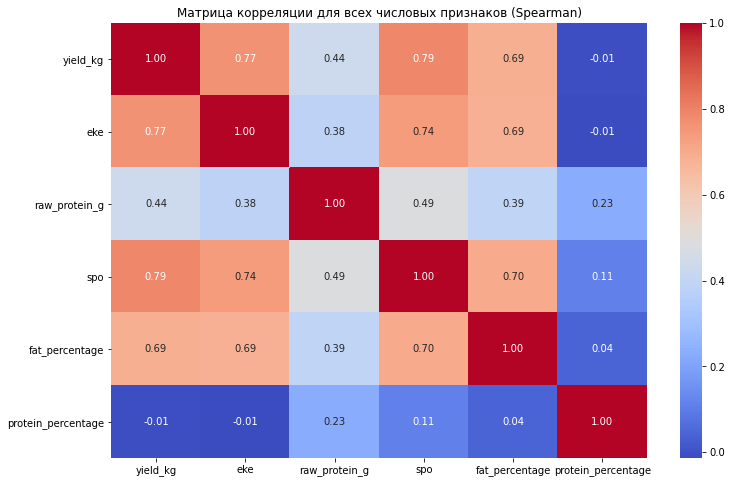

In [ ]:
num_dfs = df_main[['yield_kg', 'eke', 'raw_protein_g', 'spo', 'fat_percentage', 'protein_percentage']]
correlation_matrix = num_dfs.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции для всех числовых признаков (Spearman)')
plt.show()

**Вывод:** Между количественными признаками с НЕнормальным распределением, была выявлена высокая корреляция между удоем и СПО,ЭКЕ и содержанием жира в молоке. Так же есть высокая корреляция между ЭКЕ и СПО.

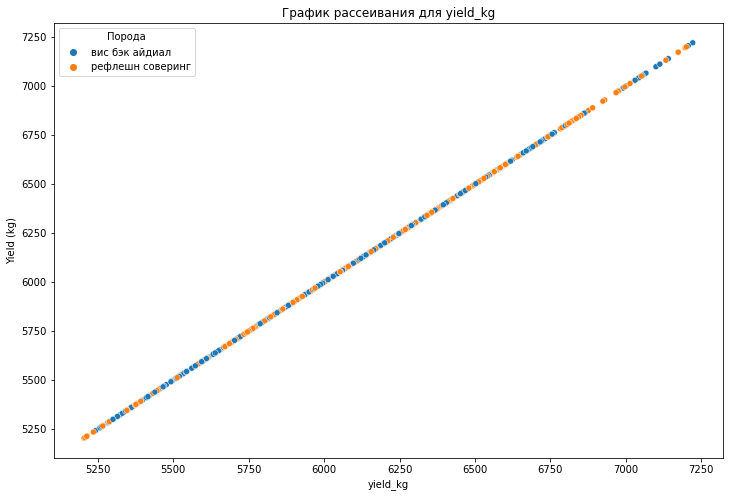

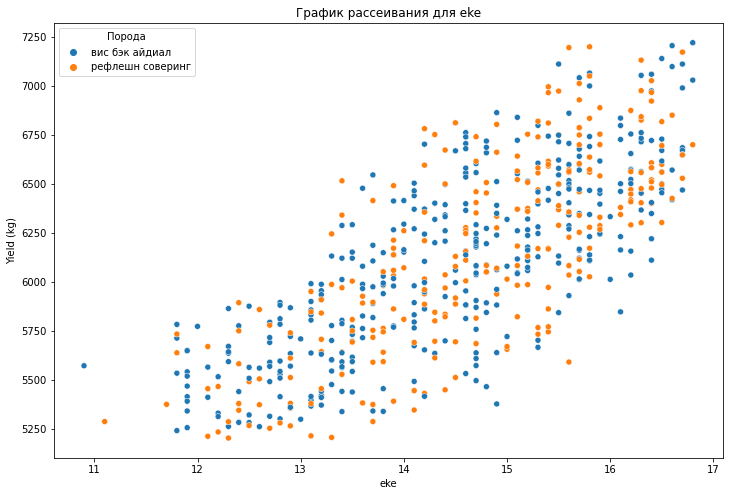

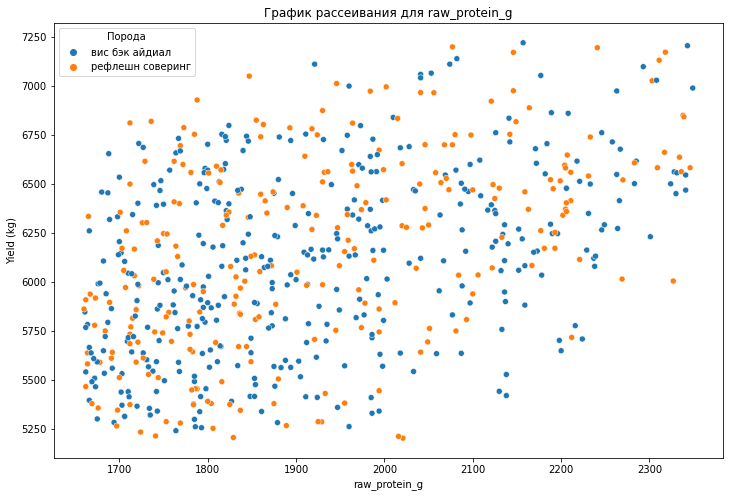

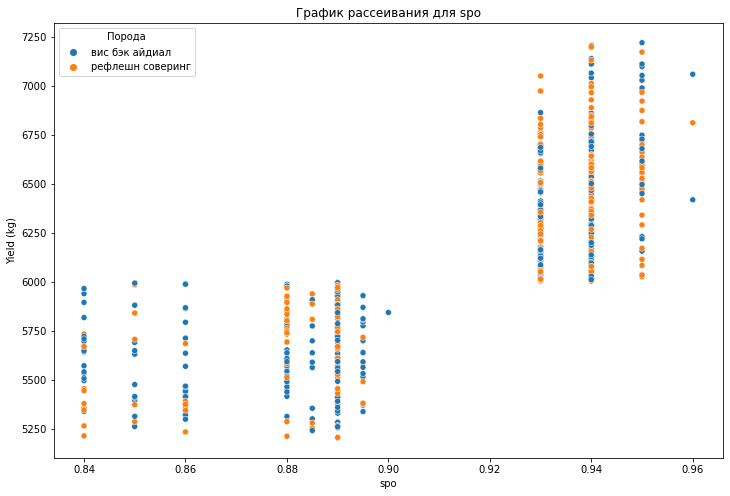

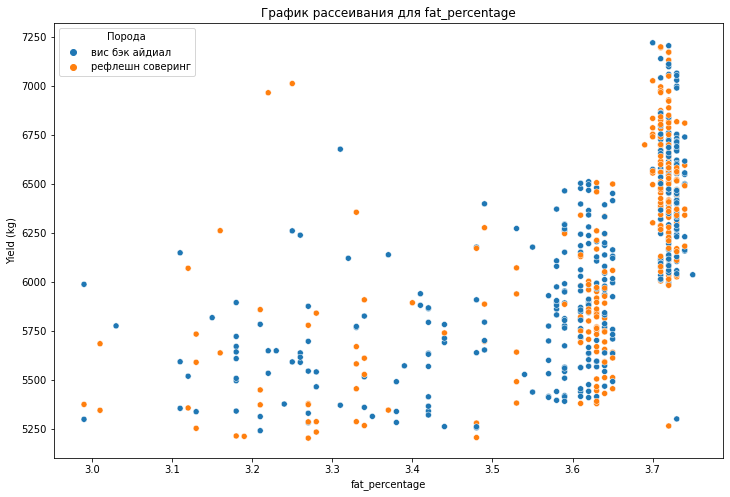

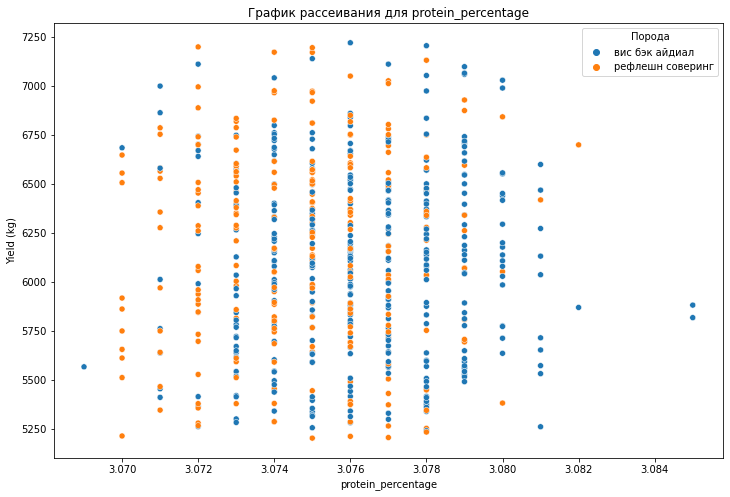

In [ ]:
grouped_breed = df_main.groupby('breed')
numerical_features = ['yield_kg', 'eke', 'raw_protein_g', 'spo', 'fat_percentage', 'protein_percentage']

for feature in numerical_features:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=feature, y='yield_kg', hue='breed', data=df_main)
    plt.title(f'График рассеивания для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Yield (kg)')
    plt.legend(title='Порода')
    plt.show()

**Вывод:** Существует средняя нелинейная(возможно степенная) зависимость удоя от ЭКЕ, а так же малая линейная зависимость удоя от сырого протеина в корме. Для других показателей линейной зависимости не наблюдается.  Для СПО и удоя наблюдается нелинейная зависимость.

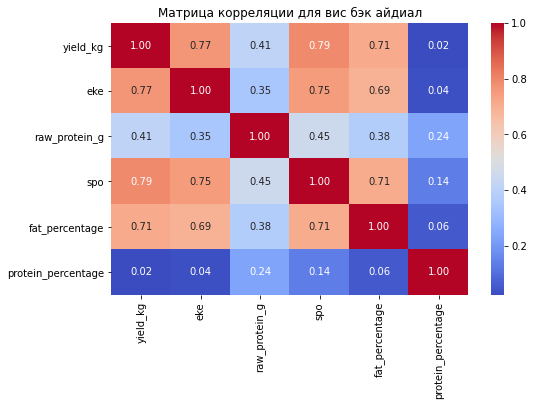

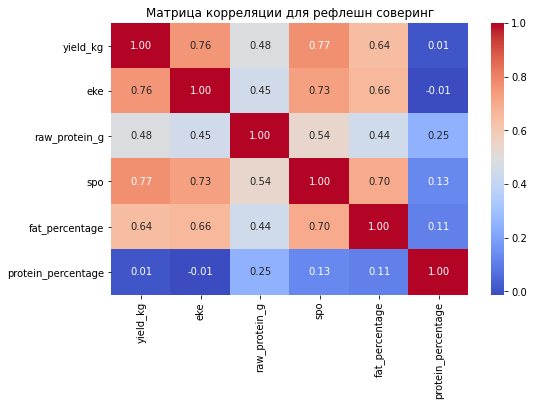

In [ ]:
for name, group in grouped_breed:
    plt.figure(figsize=(8, 5))
    sns.heatmap(group[numerical_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Матрица корреляции для {name}')
    plt.show()

**Вывод:** Корреляция для разных пород, может незначительно отличаться, так же на графиках выше, распределение было равномерно для двух пород.

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       628 non-null    int64   
 1   yield_kg                 628 non-null    int64   
 2   eke                      628 non-null    float64 
 3   raw_protein_g            628 non-null    int64   
 4   spo                      628 non-null    float64 
 5   breed                    628 non-null    object  
 6   pasture_type             628 non-null    object  
 7   sire_breed               628 non-null    object  
 8   fat_percentage           628 non-null    float64 
 9   protein_percentage       628 non-null    float64 
 10  milk_taste               628 non-null    object  
 11  age                      628 non-null    object  
 12  spo_category             628 non-null    category
 13  fat_percentage_category  628 non-null    category
dtypes: categor

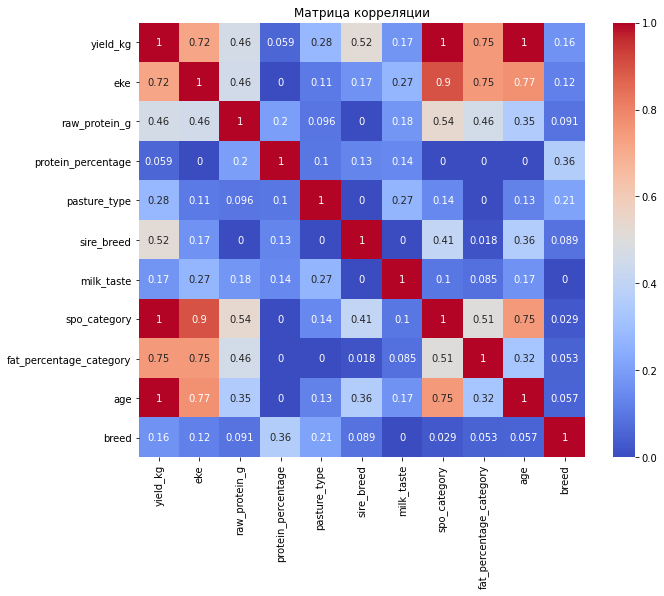

In [ ]:
correlation_matrix = df_main[['yield_kg', 'eke', 'raw_protein_g','protein_percentage',
                              'pasture_type','sire_breed', 'milk_taste','spo_category',
                              'fat_percentage_category','age','breed']].phik_matrix(
    interval_cols=['yield_kg','eke', 'raw_protein_g','protein_percentage'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

1. Между признаками 'eke' и 'spo' существует высокая корреляция.

2. В связи с корреляцией между 'spo' и 'yield_kg', а также отсутствием линейной зависимости на графике, можно предположить, что зависимость между ними нелинейно.

3. Также целевой признак 'yield_kg' имеет среднюю корреляцию с признаком 'sire_breed' (породой отца), который не коррелирует с другими показателями. Наличие корреляции между целевым признаком и 'sire_breed' может оказаться важным для модели, поскольку порода отца может влиять на прогнозирование удоя. И корреляцию с возрастом коровы.

4. Обнаружена средняя корреляция между 'milk_taste' и 'spo'.(после некоторых исправлений, корреляция низкая)

5. Существует зависимость между жирностью молока и сырым протеином, СПО,  удоем и ЭКЕ. (Сильнее всего между Удоем и процентом жира)
6. Высокая корреляция между удоем и возрастом коровы.

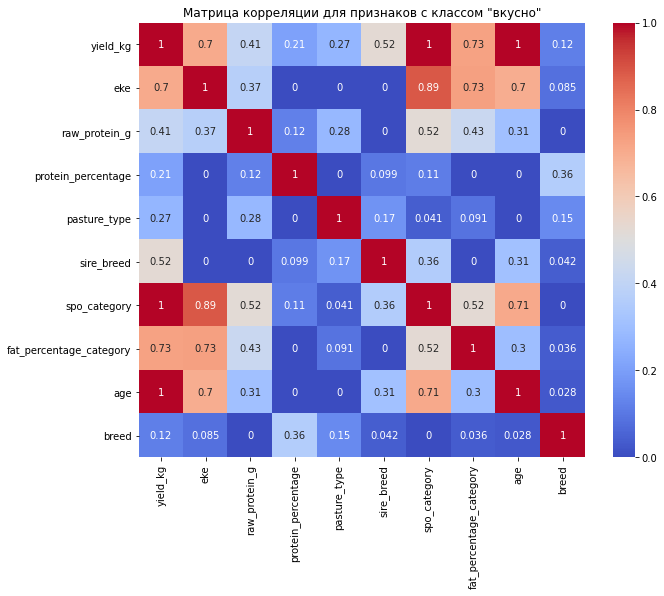

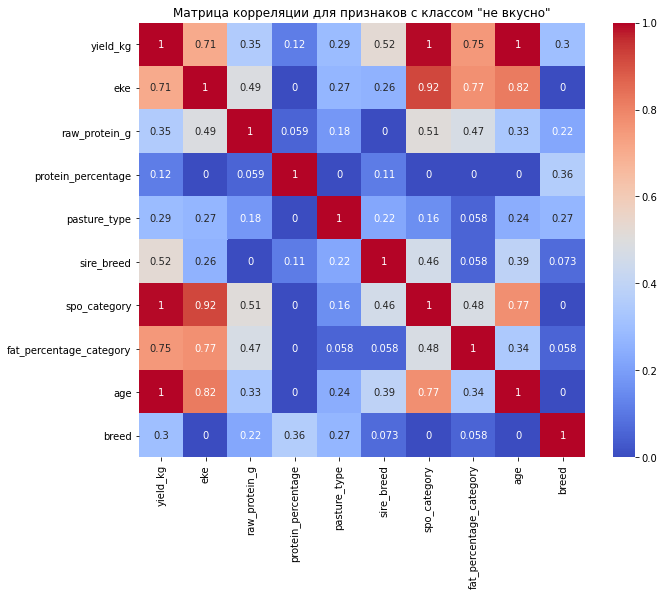

In [ ]:
groups = df_main.groupby('milk_taste')

for cls, group_data in groups:
    correlation_matrix = group_data[['yield_kg', 'eke', 'raw_protein_g',
                                     'protein_percentage', 'pasture_type',
                                     'sire_breed', 'spo_category',
                                     'fat_percentage_category','age','breed']].phik_matrix(
        interval_cols=['yield_kg', 'eke', 'raw_protein_g', 'protein_percentage'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Матрица корреляции для признаков с классом "{cls}"')
    plt.show()

**Вывод о корреляции по классам:**
* Данные в классе "вкусное" молоко  представлено на 18 % больше.(пункт 3.1.7)
* Признаки оказывающие влияние на вкус молока: СПО, ЭКЕ , жирность молока (возможно тип пастбища, содержание белка в молоке, порода коровы).  

## Обучение модели линейной регрессии

### Обучение модели на данных df_main
Поскольку данные были обработаны в пункте 2. Предобработка данных, на данном этапе нужно назвать целевые признаки и входные признаки, затем провести  разделение датафрейма на тестовую и тренировочную выборку

Оставим признаками для модели, от которых зависит удой. Это - характеристики корма, возраст коровы, порода папы быка, жирность молока. Тип пастбища не влияет на удой.

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       628 non-null    int64   
 1   yield_kg                 628 non-null    int64   
 2   eke                      628 non-null    float64 
 3   raw_protein_g            628 non-null    int64   
 4   spo                      628 non-null    float64 
 5   breed                    628 non-null    object  
 6   pasture_type             628 non-null    object  
 7   sire_breed               628 non-null    object  
 8   fat_percentage           628 non-null    float64 
 9   protein_percentage       628 non-null    float64 
 10  milk_taste               628 non-null    object  
 11  age                      628 non-null    object  
 12  spo_category             628 non-null    category
 13  fat_percentage_category  628 non-null    category
dtypes: categor

In [ ]:
df_main['yield_kg'] ** 2
df_main_mo = df_main[['yield_kg','eke','raw_protein_g','sire_breed','spo_category','fat_percentage_category']]
df_main_mo.head()

,yield_kg,eke,raw_protein_g,sire_breed,spo_category,fat_percentage_category
0,5863,14.2,1743,вис бэк айдиал,низкий спо,средняя жирность
1,5529,12.8,2138,рефлешн соверинг,низкий спо,средняя жирность
2,5810,14.0,1854,рефлешн соверинг,низкий спо,средняя жирность
3,5895,12.4,2012,вис бэк айдиал,низкий спо,низкая жирность
4,5302,12.8,1675,рефлешн соверинг,низкий спо,высокая жирность


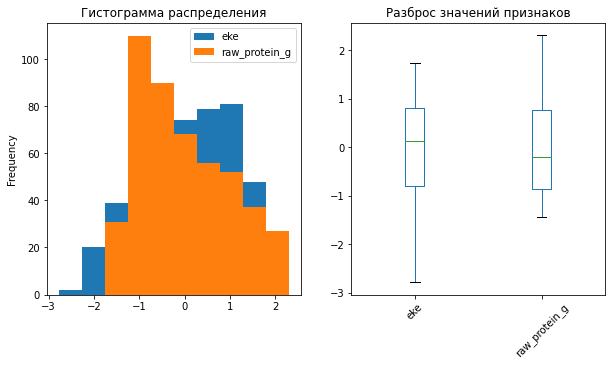

In [ ]:

X = df_main_mo.drop('yield_kg', axis=1)
y = df_main_mo['yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

cat_col_names = ['sire_breed','spo_category','fat_percentage_category']
num_col_names = ['eke','raw_protein_g']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(471, 6)
(157, 6)


**Вывод:** Распределения выглядят нормально, выбросов нет, на гистограмме имеется не большое отклонения влево, но данные все равно стремятся к нулю.

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_test_pred = model_1.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)

print(f"R^2 на тестовой выборке: {test_r2:.2f}")

R^2 на тестовой выборке: 0.78


**Вывод**: Модель показывает себя хорошо, в 0.81 случаях дает верное предсказание, но модель можно улучшить.

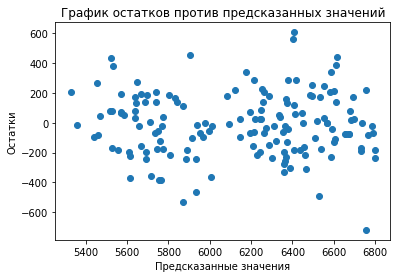

In [ ]:
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков против предсказанных значений")
plt.show()

**Вывод**: Дисперсия модели распределена не равномерно

### Построение модели линейной регресии с учетом преобразования признаков.

R^2 на тренеровочной выборке: 0.83
R^2 на тестовой выборке: 0.78


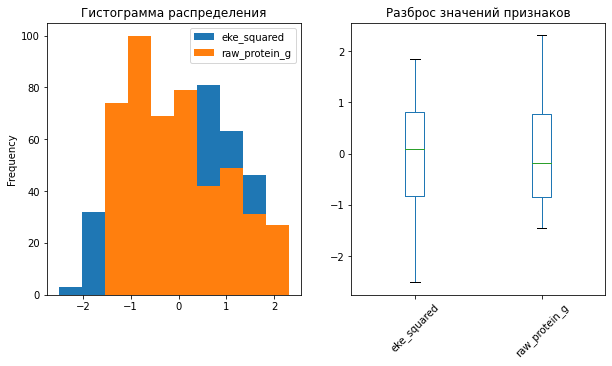

In [ ]:
df_main['eke_squared'] = df_main['eke'] ** 2

RANDOM_STATE = 42

X2 = df_main[['eke_squared','raw_protein_g','spo_category','sire_breed','fat_percentage_category']]
y2 = df_main['yield_kg']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2,
    y2,
    random_state=RANDOM_STATE)

cat_col_names_2 = ['sire_breed','spo_category','fat_percentage_category']
num_col_names_2 = ['eke_squared','raw_protein_g']

encoder = OneHotEncoder(drop='first', sparse=False)
X2_train_ohe = encoder.fit_transform(X2_train[cat_col_names_2])
X2_test_ohe = encoder.transform(X2_test[cat_col_names_2])

encoder_col_names_2 = encoder.get_feature_names()

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train[num_col_names_2])
X2_test_scaled = scaler.transform(X2_test[num_col_names_2])

X2_train_ohe = pd.DataFrame(X2_train_ohe, columns=encoder_col_names_2)
X2_test_ohe = pd.DataFrame(X2_test_ohe, columns=encoder_col_names_2)

X2_train_scaled = pd.DataFrame(X2_train_scaled, columns=num_col_names_2)
X2_test_scaled = pd.DataFrame(X2_test_scaled, columns=num_col_names_2)

X2_train = pd.concat([X2_train_ohe, X2_train_scaled], axis=1)
X2_test = pd.concat([X2_test_ohe, X2_test_scaled], axis=1)

model_2 = LinearRegression()

model_2.fit(X2_train, y2_train)

y2_train_pred = model_2.predict(X2_train)
y2_test_pred = model_2.predict(X2_test)

train2_r2 = r2_score(y2_train, y2_train_pred)
test2_r2 = r2_score(y2_test, y2_test_pred)

print(f"R^2 на тренеровочной выборке: {train2_r2:.2f}")
print(f"R^2 на тестовой выборке: {test2_r2:.2f}")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X2_train[num_col_names_2].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X2_train[num_col_names_2].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Модель показывает результаты так же

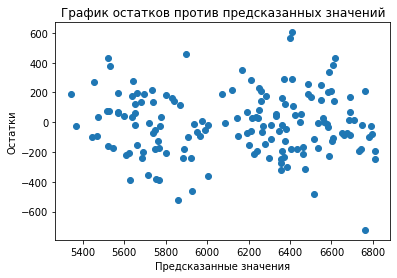

In [ ]:
residuals_2 = y2_test - y2_test_pred

plt.scatter(y2_test_pred, residuals_2)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков против предсказанных значений")
plt.show()

График показывает себя так же в сравнение с прошлой моделью

### Построение модели линейной регресии с учетом нового  признака.

R^2 на тренеровочной выборке: 0.85
R^2 на тестовой выборке: 0.77


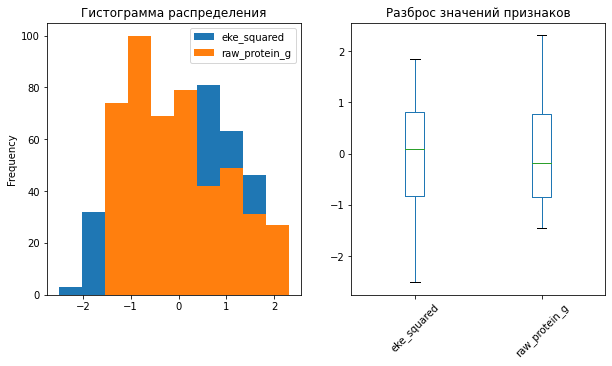

In [ ]:
df_dad = df_dad.drop(df_dad.index.difference(df_main.index))
df_main = pd.merge(df_main, df_dad[['dad_name']], left_index=True, right_index=True, suffixes=('', '_dad'))

RANDOM_STATE = 42

X3 = df_main[['eke_squared','raw_protein_g','sire_breed','spo_category','fat_percentage_category', 'dad_name']]
y3 = df_main['yield_kg']

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    random_state=RANDOM_STATE)
cat_col_names_3 = ['sire_breed','spo_category','fat_percentage_category','dad_name']
num_col_names_3 = ['eke_squared','raw_protein_g']

encoder = OneHotEncoder(drop='first', sparse=False)
X3_train_ohe = encoder.fit_transform(X3_train[cat_col_names_3])
X3_test_ohe = encoder.transform(X3_test[cat_col_names_3])

encoder_col_names_3 = encoder.get_feature_names()

scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train[num_col_names_3])
X3_test_scaled = scaler.transform(X3_test[num_col_names_3])

X3_train_ohe = pd.DataFrame(X3_train_ohe, columns=encoder_col_names_3)
X3_test_ohe = pd.DataFrame(X3_test_ohe, columns=encoder_col_names_3)

X3_train_scaled = pd.DataFrame(X3_train_scaled, columns=num_col_names_3)
X3_test_scaled = pd.DataFrame(X3_test_scaled, columns=num_col_names_3)

X3_train = pd.concat([X3_train_ohe, X3_train_scaled], axis=1)
X3_test = pd.concat([X3_test_ohe, X3_test_scaled], axis=1)

model_3 = LinearRegression()

model_3.fit(X3_train, y3_train)

y3_train_pred = model_3.predict(X3_train)
y3_test_pred = model_3.predict(X3_test)

train3_r2 = r2_score(y3_train, y3_train_pred)
test3_r2 = r2_score(y3_test, y3_test_pred)

print(f"R^2 на тренеровочной выборке: {train3_r2:.2f}")
print(f"R^2 на тестовой выборке: {test3_r2:.2f}")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X3_train[num_col_names_3].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X3_train[num_col_names_3].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

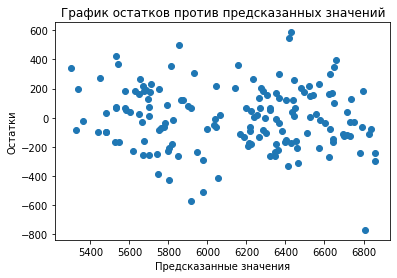

In [ ]:
residuals_3 = y3_test - y3_test_pred

plt.scatter(y3_test_pred, residuals_3)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков против предсказанных значений")
plt.show()

### Проверка моделей

In [ ]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    metrics = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }
    return metrics

In [ ]:
m1 = calculate_metrics(y_test, y_test_pred)
m2 = calculate_metrics(y2_test, y2_test_pred)
m3 = calculate_metrics(y3_test, y3_test_pred)
print("Метрики для первой модели:")
print(m1)

print("\nМетрики для второй модели:")
print(m2)

print("\nМетрики для третей модели:")
print(m3)

Метрики для первой модели:
{'MSE': 45092.91706190162, 'MAE': 166.18882493274296, 'RMSE': 212.35092903470337}

Метрики для второй модели:
{'MSE': 45109.39719747848, 'MAE': 165.9636408647113, 'RMSE': 212.38972950093063}

Метрики для третей модели:
{'MSE': 46147.97084517676, 'MAE': 170.4197557652089, 'RMSE': 214.82078773986646}


**Вывод:** Все модели выделяются в какой-то из метрик, предположим, что они похожи, так что выберу 3 модель.

In [ ]:
train_predictions = model_3.predict(X3_train)
errors = y3_train - train_predictions

lower_quantile = errors.quantile(0.025)
upper_quantile = errors.quantile(0.975)

print(f"Доверительный интервал прогноза модели на тренировочных данных: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал прогноза модели на тренировочных данных: [-328.77678232070093, 374.37639153477403]


### Прогноз удоя коров

In [ ]:
spo_mean = df_main['spo'].mean()
eke_mean = df_main['eke'].mean()
protein_mean = df_main['raw_protein_g'].mean()

spo_constant = spo_mean * 1.05
eke_constant = eke_mean * 1.05
protein_constant = protein_mean * 1.05

df_cow['spo'] = spo_constant
df_cow['eke'] = eke_constant
df_cow['raw_protein_g'] = protein_constant
df_cow['eke_squared'] = df_cow['eke'] ** 2
df_cow['spo_category'] = pd.cut(df_cow['spo'], bins=[0.83, 0.91, 0.97], labels=['низкий спо', 'высокий спо'])

X_cow_ohe = encoder.transform(df_cow[cat_col_names_3])
X_cow_scaled = scaler.transform(df_cow[num_col_names_3])

X_cow_ohe_df = pd.DataFrame(X_cow_ohe, columns=encoder_col_names_3)
X_cow_scaled_df = pd.DataFrame(X_cow_scaled, columns=num_col_names_3)

X_cow = pd.concat([X_cow_ohe_df, X_cow_scaled_df], axis=1)

y_cow_pred = model_3.predict(X_cow)
y_cow_pred_df = pd.DataFrame(y_cow_pred, columns=['cow_pred_yield'], index=df_cow.index)
y_cow_pred_df

,cow_pred_yield
0,6406.804026
1,6452.717365
2,6105.509565
3,6394.369093
4,6421.226842
5,6438.294548
6,6406.804026
7,6452.717365
8,6105.509565
9,6394.369093


In [ ]:
df_main['yield_kg'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield_kg, dtype: float64

In [ ]:
y_cow_pred_df.describe()

,cow_pred_yield
count,20.000000
mean,6379.868230
std,171.494162
min,6078.651816
25%,6326.133189
50%,6406.804026
75%,6441.900252
max,6657.550107


**Вывод:** Все коровы, представленные для покупки будут иметь хороший удой, если фермер будет использовать новую схему кормления.

In [ ]:
df_main.head()

,id,yield_kg,eke,raw_protein_g,spo,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_taste,age,spo_category,fat_percentage_category,eke_squared,dad_name
0,1,5863,14.2,1743,0.890,вис бэк айдиал,равнинное,вис бэк айдиал,3.58,3.076,вкусно,более_2_лет,низкий спо,средняя жирность,201.64,Буйный
1,2,5529,12.8,2138,0.890,вис бэк айдиал,равнинное,рефлешн соверинг,3.54,3.079,вкусно,менее_2_лет,низкий спо,средняя жирность,163.84,Соловчик
2,3,5810,14.0,1854,0.885,рефлешн соверинг,холмистое,рефлешн соверинг,3.59,3.074,не вкусно,более_2_лет,низкий спо,средняя жирность,196.00,Барин
3,4,5895,12.4,2012,0.885,рефлешн соверинг,холмистое,вис бэк айдиал,3.40,3.075,не вкусно,более_2_лет,низкий спо,низкая жирность,153.76,Буйный
4,5,5302,12.8,1675,0.885,вис бэк айдиал,равнинное,рефлешн соверинг,3.73,3.073,вкусно,менее_2_лет,низкий спо,высокая жирность,163.84,Барин


## Обучение модели логистической регрессии

Поскольку вкус молока субъективен с точки зрения фермера, и корреляция выявлена только с СПО, выбор показателей должен быть основан на логике. Вкус и запах сырого молока зависят от различных факторов, включая состояние здоровья животных, их породу, условия содержания, рацион кормления и стадию лактации. Поэтому в качестве показателей следует выбрать состав корма, содержание белков и жиров в молоке.

### Построение модели логистической регрессии

In [ ]:
df_main['milk_taste'] = df_main['milk_taste'].replace({'вкусно': 1, 'не вкусно': 0})
protein_threshold = 3.074
df_main['protein_categorical'] = np.where(df_main['protein_percentage'] <= protein_threshold, 'low', 'high')

RANDOM_STATE = 42

Xlg = df_main[['eke_squared', 'spo_category','raw_protein_g','fat_percentage_category', 'protein_categorical']]
ylg = df_main['milk_taste']

Xlg_train, Xlg_test, ylg_train, ylg_test = train_test_split(
    Xlg,
    ylg,
    random_state=RANDOM_STATE
)

cat_col_names_lg = ['spo_category','protein_categorical','fat_percentage_category']
num_col_names_lg = ['eke_squared', 'raw_protein_g']

encoder_cow = OneHotEncoder(drop='first', sparse=False)
Xlg_train_ohe = encoder_cow.fit_transform(Xlg_train[cat_col_names_lg])
Xlg_test_ohe = encoder_cow.transform(Xlg_test[cat_col_names_lg])
encoder_col_names_lg = encoder_cow.get_feature_names()


scaler_cow = StandardScaler()

Xlg_train_scaled = scaler_cow.fit_transform(Xlg_train[num_col_names_lg])
Xlg_test_scaled = scaler_cow.transform(Xlg_test[num_col_names_lg])

Xlg_train_ohe = pd.DataFrame(Xlg_train_ohe, columns=encoder_cow.get_feature_names())
Xlg_test_ohe = pd.DataFrame(Xlg_test_ohe, columns=encoder_cow.get_feature_names())
Xlg_train_scaled = pd.DataFrame(Xlg_train_scaled, columns=num_col_names_lg)
Xlg_test_scaled = pd.DataFrame(Xlg_test_scaled, columns=num_col_names_lg)


Xlg_train = pd.concat([Xlg_train_ohe, Xlg_train_scaled], axis=1)
Xlg_test = pd.concat([Xlg_test_ohe, Xlg_test_scaled], axis=1)

scaler = StandardScaler()
Xlg_train_scalled = scaler.fit_transform(Xlg_train)
Xlg_test_scalled = scaler.transform(Xlg_test)

clf = LogisticRegression()
clf = clf.fit(Xlg_train_scalled, ylg_train)

ylg_pred = clf.predict(Xlg_test_scalled)

accuracy = accuracy_score(ylg_test, ylg_pred)
recall = recall_score(ylg_test, ylg_pred)
precision = precision_score(ylg_test, ylg_pred)

print("Метрика accuracy:", accuracy)
print("Метрика recall:", recall)
print("Метрика precision:", precision)

Метрика accuracy: 0.6624203821656051
Метрика recall: 0.875
Метрика precision: 0.6470588235294118


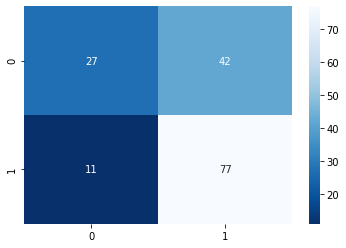

In [ ]:
cm = confusion_matrix(ylg_test, ylg_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

**Вывод:**

1. Accuracy. Значение 0.662 означает, что модель правильно классифицировала примерно 66.2% всех данных тестовой выборки.

2. Recall. Значение 0.875 означает, что модель способна обнаружить около 87.5% всех положительных случаев из всех реальных положительных случаев.

3. Precision. Значение 0.647 означает, что около 64.7 % экземпляров, классифицированных как положительные, действительно являются положительными.
В данном случае модель обладает приемлемым уровнем точности и полноты, но стоит ее улучшить, на сколько это возможно. Так же в данном случае важна ложно-положительная ошибка, поскольку если молоко окажется не вкусным, потребитель, может не купить его во второй раз.  

Критическая ошибка равна 0 в случае, когда все экземпляры правильно классифицированы, то есть нет ложно-положительных и ложно-отрицательных предсказаний. Вероятность принадлежности к положительному или отрицательному классу, будет равна 1. В нашем случае изменить вероятность, можно, присвоив значение "вкусно" = 1, массиву данных равному исходному.

In [ ]:
ylg_test_ideal = [1] * len(ylg_test)

accuracy_ideal = accuracy_score(ylg_test, ylg_test_ideal)
recall_ideal = recall_score(ylg_test, ylg_test_ideal)
precision_ideal = precision_score(ylg_test, ylg_test_ideal)

print("Метрика accuracy при критической ошибке равной 0:", accuracy_ideal)
print("Метрика recall при критической ошибке равной 0:", recall_ideal)
print("Метрика precision при критической ошибке равной 0:", precision_ideal)

Метрика accuracy при критической ошибке равной 0: 0.5605095541401274
Метрика recall при критической ошибке равной 0: 1.0
Метрика precision при критической ошибке равной 0: 0.5605095541401274


### Настройка модели
Улучшить модель можно с помощью изменения порога классификации.

In [ ]:
thresholds = np.arange(0, 1.01, 0.01)
results = []

for threshold in thresholds:
    ylg_pred_thresholded = (clf.predict_proba(Xlg_test_scalled)[:,1] >= threshold).astype(int)
    accuracy = accuracy_score(ylg_test, ylg_pred_thresholded)
    recall = recall_score(ylg_test, ylg_pred_thresholded)
    precision = precision_score(ylg_test, ylg_pred_thresholded, zero_division=0)
    results.append([threshold, accuracy, recall, precision])

results_df = pd.DataFrame(results, columns=['Threshold', 'Accuracy', 'Recall', 'Precision'])

In [ ]:
pd.set_option('display.max_rows', None)
results_df.head()

,Threshold,Accuracy,Recall,Precision
0,0.00,0.56051,1.0,0.56051
1,0.01,0.56051,1.0,0.56051
2,0.02,0.56051,1.0,0.56051
3,0.03,0.56051,1.0,0.56051
4,0.04,0.56051,1.0,0.56051


В данном случае важно, что бы модель не ошиблась в выборе не вкусного молока вкусным, можно попробовать поднять Precision с помощью порога классификации - 0.83, тем самым уменьшим вероятность ложноположительных ошибок.

Метрика accuracy с новым порогом: 0.46496815286624205
Метрика recall с новым порогом: 0.045454545454545456
Метрика precision с новым порогом: 1.0


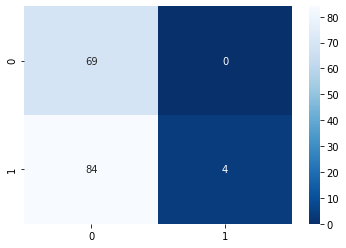

In [ ]:
y_proba = clf.predict_proba(Xlg_test_scalled)
new_threshold = 0.83

ylg_pred_new_threshold = (y_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(ylg_test, ylg_pred_new_threshold)
recall_new_threshold = recall_score(ylg_test, ylg_pred_new_threshold)
precision_new_threshold = precision_score(ylg_test, ylg_pred_new_threshold)

print("Метрика accuracy с новым порогом:", accuracy_new_threshold)
print("Метрика recall с новым порогом:", recall_new_threshold)
print("Метрика precision с новым порогом:", precision_new_threshold)

cm = confusion_matrix(ylg_test,ylg_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

**Вывод:** Модель точно предсказала 4 результата, в отношении к общему количеству это очень мало, но с другой стороны результат не допускает ложноположительной ошибки, и вкусное молоко, точно окажется вкусным.

In [ ]:
protein_threshold_cow = 3.65
df_cow['protein_categorical'] = np.where(df_cow['protein_percentage'] <= protein_threshold_cow, 'low', 'high')

In [ ]:
cat_col_names_lg

['spo_category', 'protein_categorical', 'fat_percentage_category']

### Применение модели логистической регрессии на датафрейме df_cow

In [ ]:
Xlg_cow_cat = encoder_cow.transform(df_cow[cat_col_names_lg])
Xlg_cow_cat = pd.DataFrame(Xlg_cow_cat, columns=encoder_col_names_lg)

Xlg_cow_num = scaler_cow.transform(df_cow[num_col_names_lg])
Xlg_cow_num = pd.DataFrame(Xlg_cow_num, columns=num_col_names_lg)

Xlg_cow = pd.concat([Xlg_cow_cat, Xlg_cow_num], axis=1)

ylg_cow_pred = clf.predict(Xlg_cow)

print("Предсказанные классы для df_cow:", ylg_cow_pred)

ylg_cow_pred_proba = clf.predict_proba(Xlg_cow)
new_threshold = 0.83
predicted_classes_83 = (ylg_cow_pred_proba[:, 1] >= new_threshold).astype(int)
print("Предсказанные классы для df_cow с порогом 0.83:", predicted_classes_83)

Предсказанные классы для df_cow: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Предсказанные классы для df_cow с порогом 0.83: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Порог оказался слишком высоким, ошибка второго рода слишком высока. Под высокие требования фермера не подошла ни одна корова из предложенных.

## Итоговые выводы

In [ ]:
milk_taste_pred = pd.Series(predicted_classes_83, name='milk_taste_pred', index=df_cow.index)

y_cow_pred_df['milk_taste_pred'] = milk_taste_pred
y_cow_pred_df['cow_pred_yield'] = y_cow_pred_df['cow_pred_yield'].astype(int)
y_cow_pred_df

,cow_pred_yield,milk_taste_pred
0,6406,0
1,6452,0
2,6105,0
3,6394,0
4,6421,0
5,6438,0
6,6406,0
7,6452,0
8,6105,0
9,6394,0


**Результаты:**


**1. Из 20 коров, предложенных для покупки фермеру, ни одна корова не соответствует его требованиям.**

2. На основе предсказаний модели фермер может принять следующие рекомендации:
    - Выбирать коров с более высокими предсказанными вероятностями производства молока высокого качества.
    - Проводить дополнительные тестирования или исследования для коров с низкими предсказанными вероятностями, чтобы понять причины низкого качества молока и принять соответствующие меры.
    - При сборе данных о коровах стоит обратить внимание и на другие показатели, такие как уровень сахаров в молоке или другие  характеристики.
3. Выводы о моделях линейной и логистической регрессии:
   - Линейная регрессия: Эта модель может быть полезна для прогнозирования количества молока, производимого коровой на основе ее характеристик. Однако она не предоставляет прямой информации о качестве молока.
   - Логистическая регрессия: Эта модель может классифицировать коров на основе их характеристик и предсказать вероятность того, что корова будет приносить молоко высокого качества. Таким образом, она является более подходящей для решения задачи оценки качества молока.
   - Для улучшение качества модели используются например исключение дополнительных признаков, а так же масштабирование и кодирование    
4. Важные метрики для анализа рисков и экономических расчетов:
    - Accuracy: Позволяет оценить общее качество классификации модели. Это важно для определения того, насколько точно модель классифицирует данные, что имеет значение при принятии решений, связанных с инвестициями и ресурсами.
    - Precision: Оценивает долю объектов, классифицированных моделью как положительные (например, коровы, приносящие молоко высокого качества), из тех, которые действительно положительны.
    - Recall: Оценивает долю объектов, действительно положительных (например, коровы, приносящие молоко высокого качества), из всех объектов, которые могут быть положительными.
    
    Существуют и другии метрики, которые так же могут быть использованы для проверки точности модели, выбор метрики зависит от задачи, а так же ошибки которую следует избегать.